In [5]:
#Step 2: Load Libraries & Dataset
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('loan_prediction.csv')  # Replace with your downloaded CSV
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [6]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


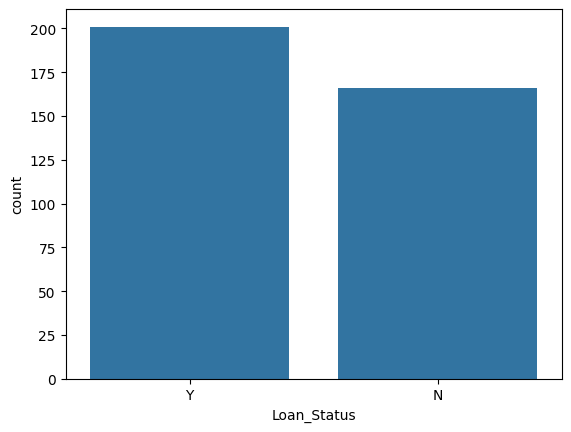

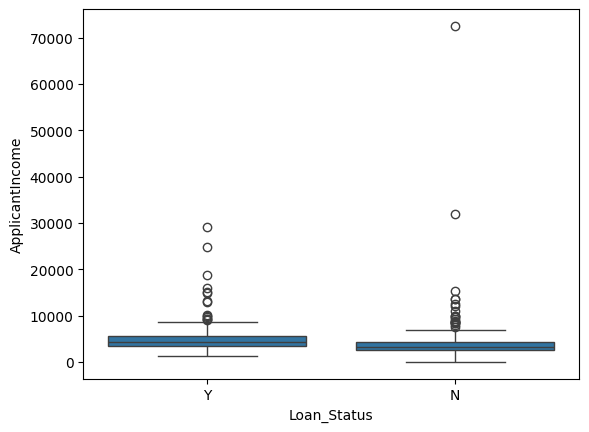

In [7]:
#Step 3: Exploratory Data Analysis (EDA)
# Basic info
df.info()

# Check missing values
df.isnull().sum()

# Summary statistics
df.describe()

#Visualizations
# Loan Status Distribution
sns.countplot(x='Loan_Status', data=df)
plt.show()

# Applicant Income vs Loan Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()

In [8]:
#Step 4: Data Preprocessing

#Handle missing values

#Encode categorical variables

#Scale numeric variables

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.fit_transform(
    X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.transform(
    X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

/tmp/ipython-input-275162836.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-275162836.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [11]:
# Drop Loan_ID (not useful for prediction)
df.drop('Loan_ID', axis=1, inplace=True)


In [12]:
#Step 2: Make sure all other categorical columns are encoded
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
    df[col] = le.fit_transform(df[col])

In [13]:
#Step 3: Split features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Step 4: Scale numeric features (optional but recommended)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.fit_transform(
    X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.transform(
    X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])


In [15]:
#Step 5: Train Logistic Regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

In [16]:
#Step 6: Evaluate Your Models
#1️⃣ Logistic Regression Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7702702702702703

Confusion Matrix:
 [[21 14]
 [ 3 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.60      0.71        35
           1       0.72      0.92      0.81        39

    accuracy                           0.77        74
   macro avg       0.80      0.76      0.76        74
weighted avg       0.79      0.77      0.76        74



In [17]:
#2️⃣ Random Forest Evaluation
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9054054054054054

Confusion Matrix:
 [[29  6]
 [ 1 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89        35
           1       0.86      0.97      0.92        39

    accuracy                           0.91        74
   macro avg       0.92      0.90      0.90        74
weighted avg       0.91      0.91      0.90        74



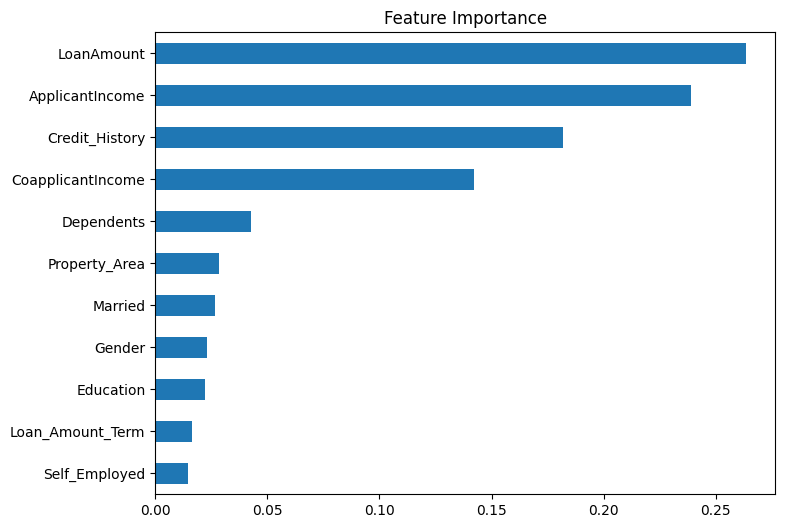

In [18]:
#3️⃣ Feature Importance (Random Forest)
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()

In [19]:
#Step 7: Save Processed Dataset
df.to_csv("loan_prediction_processed.csv", index=False)
print("Processed dataset saved!")

Processed dataset saved!
